Employee scheduling explained in this notebook is not a hard problem. Of course, you can face a very challenging problem regarding employee scheduling (workforce optimization). In this model, you have to solve a 2-day scheduling problem (suppose it is valentine's day and you made some campaigns for this special day). You used historical data (past valentine's day) and predicted employee requirements for every 2-hour period. Every employee can be worked at most 8 hours because of union or government rules. How can you optimize this process? The trickiest part is identifying the appropriate decision variables. You need to identify the number or workers who start to work as variables in a particular period. If you choose the number of employees working in a particular period as a variable, you will absolutely fail.

In [61]:
import gurobipy as gb
import numpy as np
import matplotlib.pyplot as plt

In [62]:
g = 2 #number of days
n = 12 #number or time slots in a day (number of shifts), 
t = 8 #maximum hour of working time in a day.
S = int((t/(24/n))) # Calculated for how many time slots an employee work through. Ee have 2-hour-shift and 
#an employee must work 1th two-hour priod through 4th 2-hour period
min_requirement = {0:10,1:10,2:10,3:12,4:12,5:13,6:14,7:14,8:15,9:15,10:16,11:16,12:16,13:17,14:17,15:20,16:18,17:18,18:20,19:21,
20:19,21:25,22:25,23:25,24:26,25:22,26:15}#The first three time slots are in normal setup. Others are in campaign period
L = list(range(len(min_requirement)))

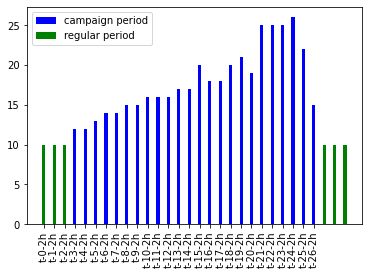

In [63]:
#visualisation. A campaign period between normal setups.
labels = ["t-"+str(i)+"-"+str(int(24/n))+"h" for i in range(len(min_requirement))]
width = 0.3
plt.bar(np.arange(1,len(min_requirement)+1),min_requirement.values(), width, color = "b", label = "campaign period")
plt.bar([1,2,3,28,29,30],[10,10,10,10,10,10], width, color = "g", label = "regular period")
plt.xticks(range(1,len(min_requirement)+1),labels, rotation = 90)
plt.legend()
plt.show()

In [64]:
mdl = gb.Model("Employee_Scheduling")

In [65]:
x = mdl.addVars(len(min_requirement),vtype = gb.GRB.INTEGER, name = "x")#number of employees who start to work in time period Xi

In [66]:
mdl.setObjective(gb.quicksum(x[i] for i in range(len(min_requirement))))

In [67]:
mdl.addConstrs(gb.quicksum(x[L[i-s]] for s in range(S)) >= min_requirement[i] for i in range(len(min_requirement)))

{0: <gurobi.Constr *Awaiting Model Update*>,
 1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>,
 16: <gurobi.Constr *Awaiting Model Update*>,
 17: <gurobi.Constr *Awaiting Model Update*>,
 18: <gurobi.Constr *Awaiting Model Update*>,
 19: <gurobi.Constr *Awaiting Model Update*>,
 20: <gurobi.Constr *Awaiting Model Update*>,
 21: <gurobi.Constr *Awaiting Model Update*>

In [68]:
mdl.optimize()

Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 27 rows, 27 columns and 108 nonzeros
Model fingerprint: 0x9abf20d1
Variable types: 0 continuous, 27 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+01, 3e+01]
Found heuristic solution: objective 120.0000000
Presolve time: 0.00s
Presolved: 27 rows, 27 columns, 108 nonzeros
Variable types: 0 continuous, 27 integer (0 binary)

Root relaxation: objective 1.153333e+02, 26 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  115.33333    0   20  120.00000  115.33333  3.89%     -    0s
H    0     0                     116.0000000  115.33333  0.57%     -    0s
     0     0  115.33333    0  

In [69]:
mdl.printAttr("X")


    Variable            X 
-------------------------
        x[0]            5 
        x[2]            4 
        x[3]            5 
        x[4]            3 
        x[5]            1 
        x[6]            5 
        x[7]            5 
        x[8]            4 
        x[9]            1 
       x[10]            6 
       x[11]            5 
       x[12]            4 
       x[13]            2 
       x[14]            6 
       x[15]            8 
       x[16]            2 
       x[17]            2 
       x[18]            8 
       x[19]            9 
       x[21]            8 
       x[22]            8 
       x[23]           10 
       x[25]            4 
       x[26]            1 


In [70]:
liste =  [int(x[i].x) for i in range(len(min_requirement))]

In [71]:
liste1 = []
for i in range(len(liste)):
    a = 0
    for j in range(S):
        a += liste[i]
        i -= 1
       
    liste1.append(a)
print(liste1,min_requirement.values())  

[10, 10, 10, 14, 12, 13, 14, 14, 15, 15, 16, 16, 16, 17, 17, 20, 18, 18, 20, 21, 19, 25, 25, 26, 26, 22, 15] dict_values([10, 10, 10, 12, 12, 13, 14, 14, 15, 15, 16, 16, 16, 17, 17, 20, 18, 18, 20, 21, 19, 25, 25, 25, 26, 22, 15])


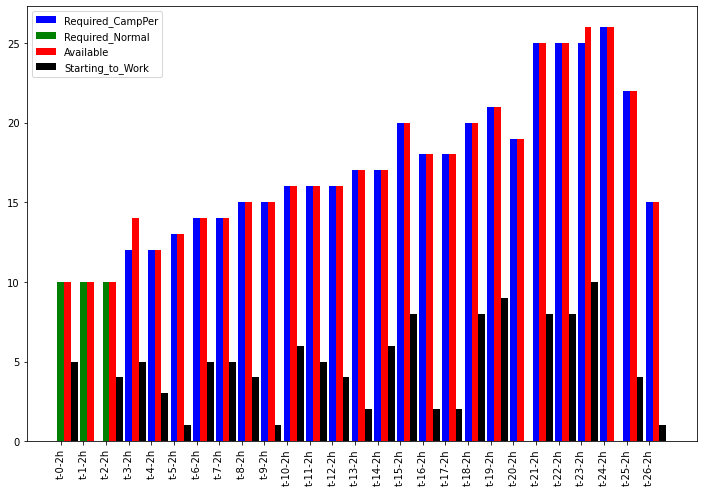

In [72]:
plt.figure(figsize=(12,8))
labels = ["t-"+str(i)+"-"+str(int(24/n))+"h" for i in range(len(min_requirement))]
width = 0.3
plt.bar(np.arange(1,len(min_requirement)+1),min_requirement.values(), width, color = "b", label = "Required_CampPer")
plt.bar([1,2,3],[10,10,10], width, color = "g",label = "Required_Normal")
plt.bar(np.arange(1,len(min_requirement)+1)+width,liste1,width, color = "r", label = "Available")
plt.bar(np.arange(1,len(min_requirement)+1)+width*2,liste,width, color = "black", label = "Starting_to_Work")

plt.xticks(range(1,len(min_requirement)+1),labels, rotation = 90)
plt.legend()
plt.show()

In [73]:
mdl.write("employee_scheduling.lp")#save algebraic model and check whether model is true or not 